In [ ]:
import librosa as lb 
import matplotlib.pyplot as plt 
import librosa.display as libDisp
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import numpy as np 

In [ ]:
notes = []
for i in range(5, 7):
    for note in ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']:
        notes.append(f'{note}{i}')

mapping = {i: notes[i] for i in range(len(notes))}

In [ ]:
a = np.load('song1.npz', allow_pickle=True)

b = a['arr_0']
b = b.sum(axis=0)

In [ ]:
X = b['X'][:]
y = b['y'][:]

newX = []
newY = [] 

# Basically seperates all multi-hot into individual one-hot.
# If it's a multi-hot, it makes a copy of x for each 
for note in range(X.shape[0]):
    dic = np.arange(60, 84)
    curr_X = X[note, :]
    curr_Y = y[note, :]
    idx = np.where(curr_Y == 1)[0]

    for loc in idx:
        newX.append(curr_X)
        newY.append(dic[loc])


newX = np.array(newX)
newY = np.array(newY)


# LDA
clf = LinearDiscriminantAnalysis(n_components=2)
X_lda = clf.fit(newX, newY).transform(newX)

print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 4097
Reduced number of features: 2


In [ ]:
X_transformed = clf.fit_transform(newX, newY)

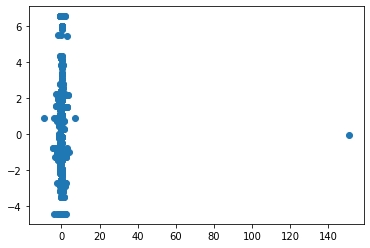

In [ ]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])